In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy import stats
from sklearn.utils import class_weight
from sklearn.tree import plot_tree

In [68]:
data = pd.read_csv('EEG_Eye_State_Classification.csv')

In [69]:
data.head(10)

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
5,4321.03,4004.62,4284.10,4153.33,4345.64,4587.18,4093.33,4616.92,4202.56,4232.82,4209.74,4281.03,4628.21,4389.74,0
6,4319.49,4001.03,4280.51,4151.79,4343.59,4584.62,4089.74,4615.90,4212.31,4226.67,4201.03,4269.74,4625.13,4378.46,0
7,4325.64,4006.67,4278.46,4143.08,4344.10,4583.08,4087.18,4614.87,4205.64,4230.26,4195.90,4266.67,4622.05,4380.51,0
8,4326.15,4010.77,4276.41,4139.49,4345.13,4584.10,4091.28,4608.21,4187.69,4229.74,4202.05,4273.85,4627.18,4389.74,0
9,4326.15,4011.28,4276.92,4142.05,4344.10,4582.56,4092.82,4608.72,4194.36,4228.72,4212.82,4277.95,4637.44,4393.33,0


In [70]:
data.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   F7            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  eyeDetection  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


In [72]:
data.isnull().sum()

AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64

In [73]:
print("Shape before removing outliers:", data.shape)

Shape before removing outliers: (14980, 15)


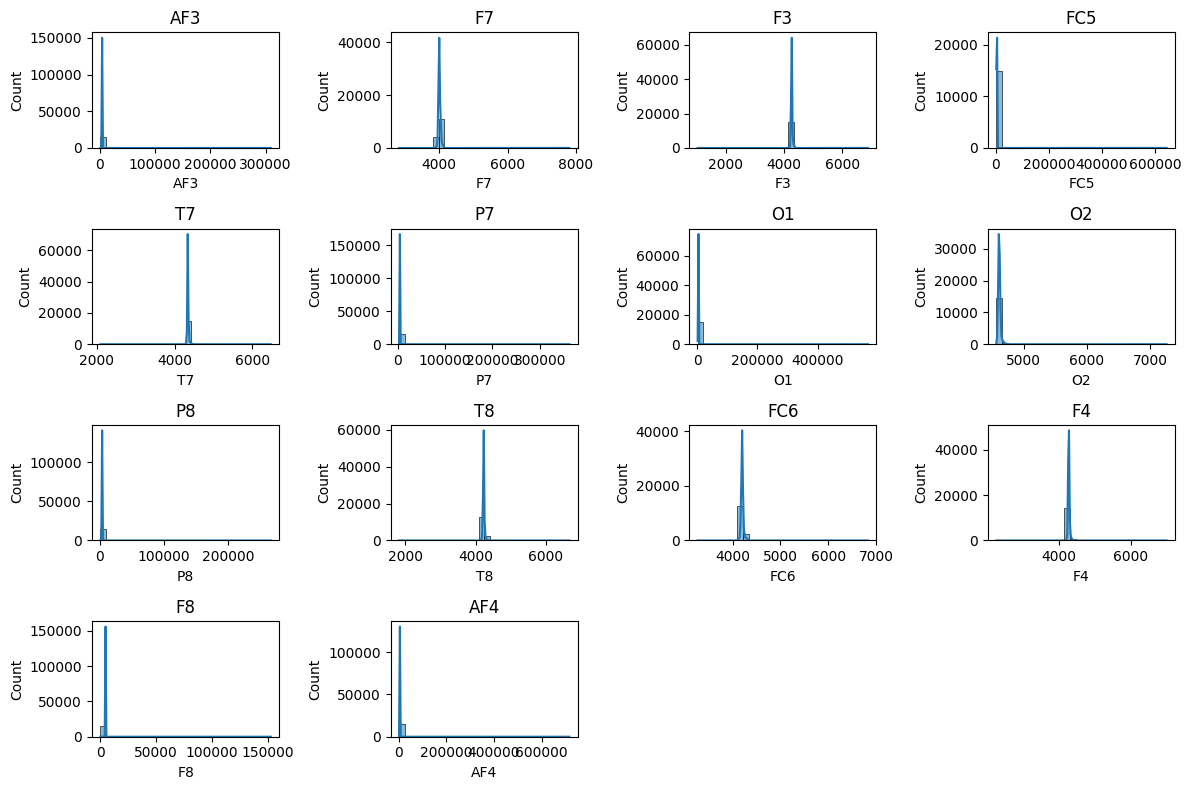

In [74]:
plt.figure(figsize=(12, 8))
for i in range(14):
    plt.subplot(4, 4, i+1)
    sns.histplot(data.iloc[:, i], bins=30, kde=True)
    plt.title(data.columns[i])
plt.tight_layout()
plt.show()

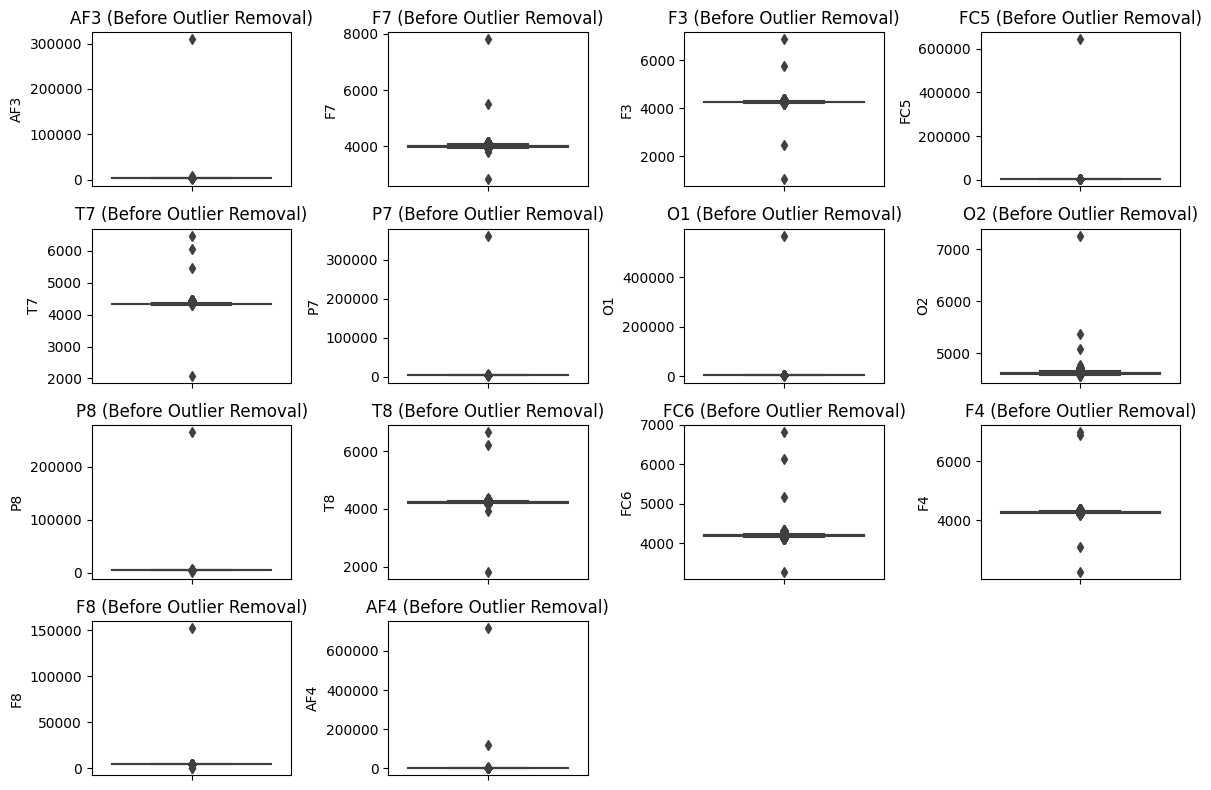

In [75]:
plt.figure(figsize=(12, 8))
for i in range(14):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=data.iloc[:, i])
    plt.title(data.columns[i] + ' (Before Outlier Removal)')
plt.tight_layout()
plt.show()

In [76]:
from scipy import stats
z_scores = np.abs(stats.zscore(data.iloc[:, :-1]))
threshold = 3


In [77]:
data

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


In [78]:
outlier_mask = (z_scores < threshold).all(axis=1)


In [79]:
data = data[outlier_mask]


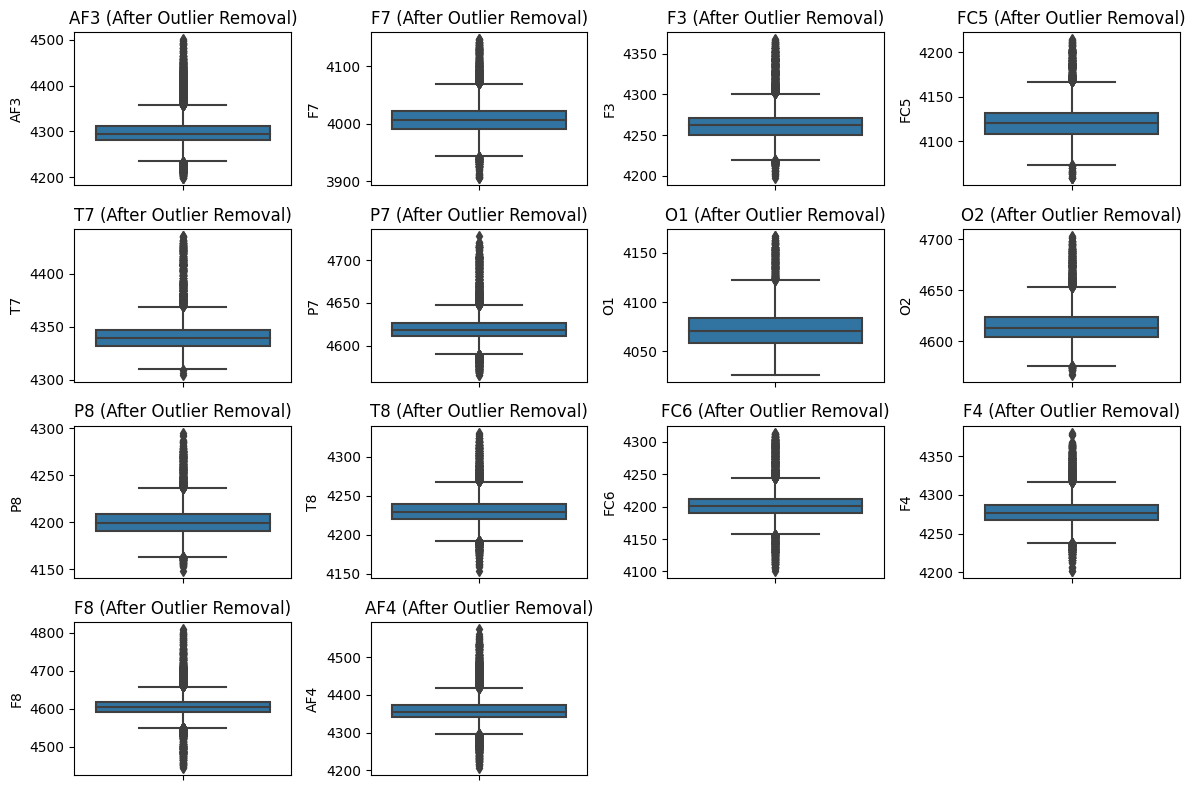

In [80]:
plt.figure(figsize=(12, 8))
for i in range(14):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=data.iloc[:, i])
    plt.title(data.columns[i] + ' (After Outlier Removal)')
plt.tight_layout()
plt.show()

In [81]:
print("Shape before removing outliers:", data.shape)

Shape before removing outliers: (14892, 15)


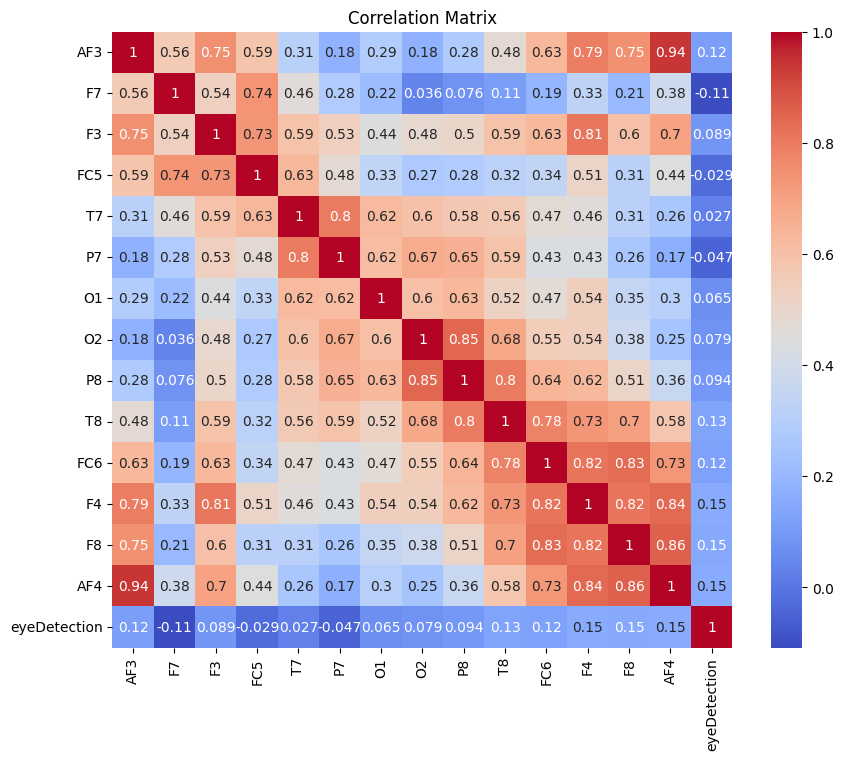

In [82]:
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [83]:
X = data.drop(columns=['eyeDetection'])
y = data['eyeDetection']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [84]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
}

In [86]:
best_model = None
best_f1_score = 0

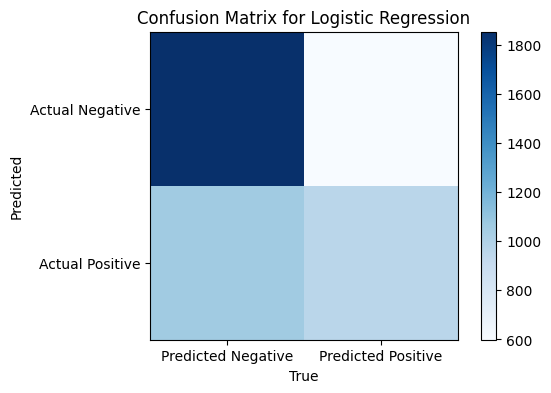

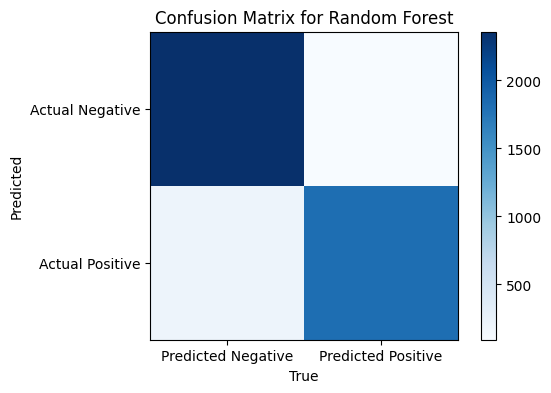

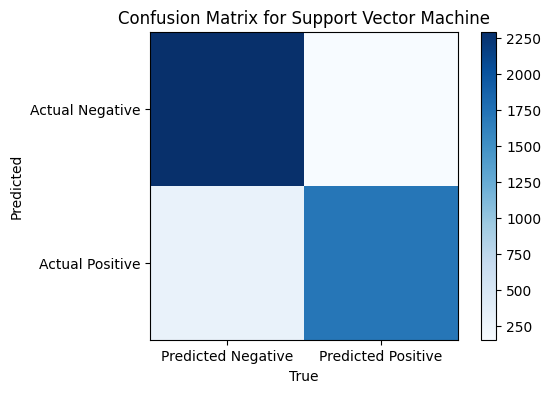

Best Model based on F1-Score: Random Forest


In [87]:
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    f1 = f1_score(y_test, y_pred)

    if f1 > best_f1_score:
        best_f1_score = f1
        best_model = model_name

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.colorbar()
    plt.xticks([0, 1], ["Predicted Negative", "Predicted Positive"])
    plt.yticks([0, 1], ["Actual Negative", "Actual Positive"])
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.show()

print(f"Best Model based on F1-Score: {best_model}")


In [88]:
print(f"Best Model based on F1-Score: {best_model}")

Best Model based on F1-Score: Random Forest


In [89]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
y_pred_rf = rf_classifier.predict(X_test_scaled)

In [90]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)


In [91]:
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

Accuracy: 0.9266
Precision: 0.9456
Recall: 0.8884
F1-Score: 0.9161


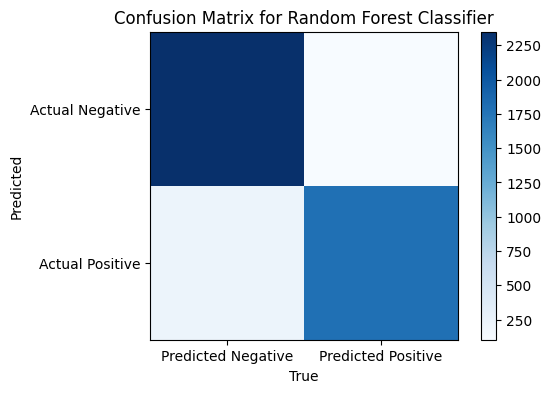

In [92]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
plt.imshow(cm_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.colorbar()
plt.xticks([0, 1], ["Predicted Negative", "Predicted Positive"])
plt.yticks([0, 1], ["Actual Negative", "Actual Positive"])
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

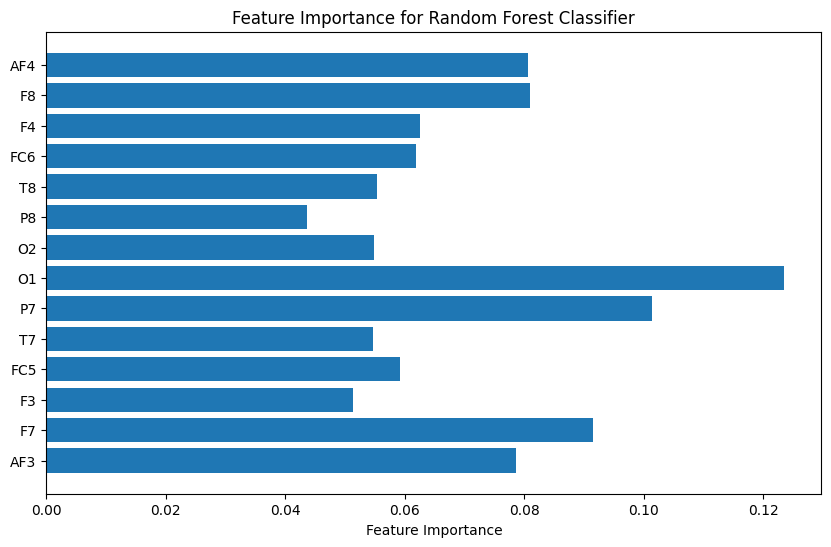

In [93]:
feature_importance = rf_classifier.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(range(X_train_scaled.shape[1]), feature_importance, align="center")
plt.yticks(range(X_train_scaled.shape[1]), data.columns[:-1])
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Random Forest Classifier")
plt.show()

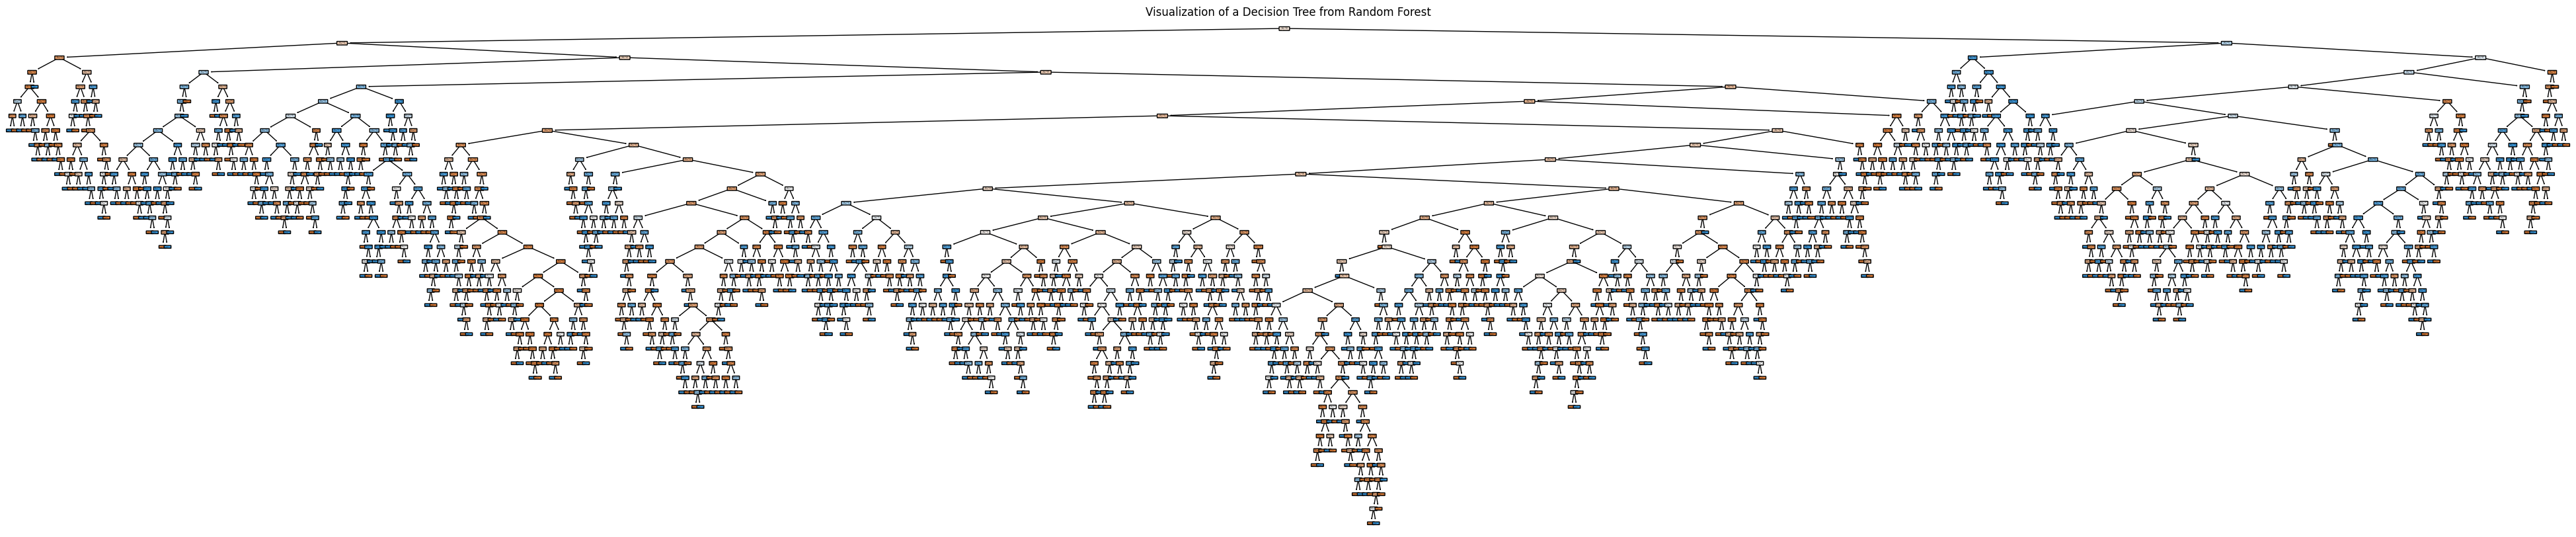

In [94]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50, 10))
plot_tree(rf_classifier.estimators_[0], feature_names=data.columns[:-1], filled=True, rounded=True)
plt.title("Visualization of a Decision Tree from Random Forest")
plt.show()


In [95]:
def predict_eye_detection(dependent_variables):
    input_data = np.array(dependent_variables).reshape(1, -1)
    input_data_scaled = scaler.transform(input_data)

    prediction = rf_classifier.predict(input_data_scaled)[0]

    if prediction == 1:
        return "Eyes Detected"
    else:
        return "Eyes Not Detected"

In [96]:
input_variables = [0.2, 0.3, 0.4, 0.1, 0.2, 0.3, 0.4, 0.1, 0.2, 0.3, 0.4, 0.1, 0.2, 0.3]  # Replace with your input values
result = predict_eye_detection(input_variables)
print("Prediction:", result)

Prediction: Eyes Not Detected


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
